In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
%matplotlib inline

In [2]:
df = pd.read_csv('australian.dat',delimiter=' ')
df

,1,22.08,11.46,2,4,4.1,1.585,0,0.1,0.2,1.1,2.1,100,1213,0.3
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
X=df.iloc[:, :-1].values
y=df.iloc[:,-1].values

In [4]:
X, y

(array([[0.000e+00, 2.267e+01, 7.000e+00, ..., 2.000e+00, 1.600e+02,
         1.000e+00],
        [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.000e+00, 2.800e+02,
         1.000e+00],
        [0.000e+00, 2.167e+01, 1.150e+01, ..., 2.000e+00, 0.000e+00,
         1.000e+00],
        ...,
        [0.000e+00, 1.883e+01, 9.540e+00, ..., 2.000e+00, 1.000e+02,
         1.000e+00],
        [0.000e+00, 2.742e+01, 1.450e+01, ..., 2.000e+00, 1.200e+02,
         1.200e+01],
        [1.000e+00, 4.100e+01, 4.000e-02, ..., 1.000e+00, 5.600e+02,
         1.000e+00]]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=14,sigma=1.0,learning_rate=0.5)

som.random_weights_init(X)
som.train_random(X, 100)

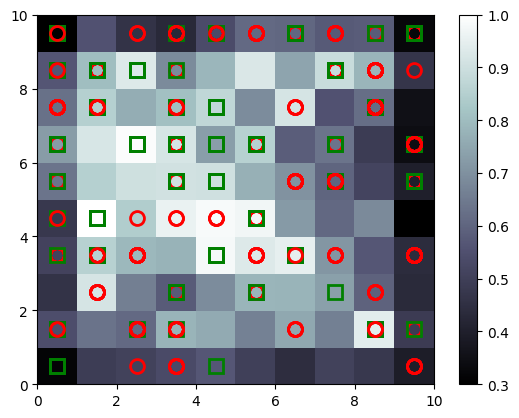

In [10]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)  # Distance map as background
colorbar()

# Define markers and colors for visualization
marker = ['o', 's']
colors = ['r', 'g']

# Plot each sample on the SOM
for i, x in enumerate(X):
    w = som.winner(x)  # Find the winning neuron for the current sample
    plot(w[0] + 0.5,  # x-coordinate of the winning neuron
         w[1] + 0.5,  # y-coordinate of the winning neuron
         marker[y[i]],  # Marker shape based on the class
         markeredgecolor=colors[y[i]],  # Marker edge color based on the class
         markerfacecolor='None',  # No fill color
         markersize=10,  # Marker size
         markeredgewidth=2)  # Marker edge width


In [ ]:
som.p

In [11]:
mapping = som.win_map(X)
mapping

defaultdict(list,
            {(np.int64(6),
              np.int64(1)): [array([0.        , 0.13413534, 0.25      , 0.5       , 0.53846154,
                     0.375     , 0.00578947, 0.        , 0.        , 0.        ,
                     0.        , 0.5       , 0.08      , 0.        ]), array([0.00000000e+00, 1.65413534e-01, 4.88035714e-01, 5.00000000e-01,
                     7.69230769e-01, 8.75000000e-01, 5.26315789e-02, 0.00000000e+00,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
                     1.40000000e-01, 1.00000000e-05]), array([0.        , 0.10646617, 0.30357143, 0.5       , 0.53846154,
                     0.375     , 0.00578947, 0.        , 0.        , 0.        ,
                     0.        , 0.5       , 0.        , 0.00351   ]), array([0.00000000e+00, 1.22857143e-01, 4.16607143e-01, 5.00000000e-01,
                     2.30769231e-01, 8.75000000e-01, 2.98245614e-03, 0.00000000e+00,
                     0.00000000e+00,